In [2]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Load Mnist dataset
mnist = tf.keras.datasets.mnist
(images, labels), (_,_ ) = mnist.load_data()

Shift image right

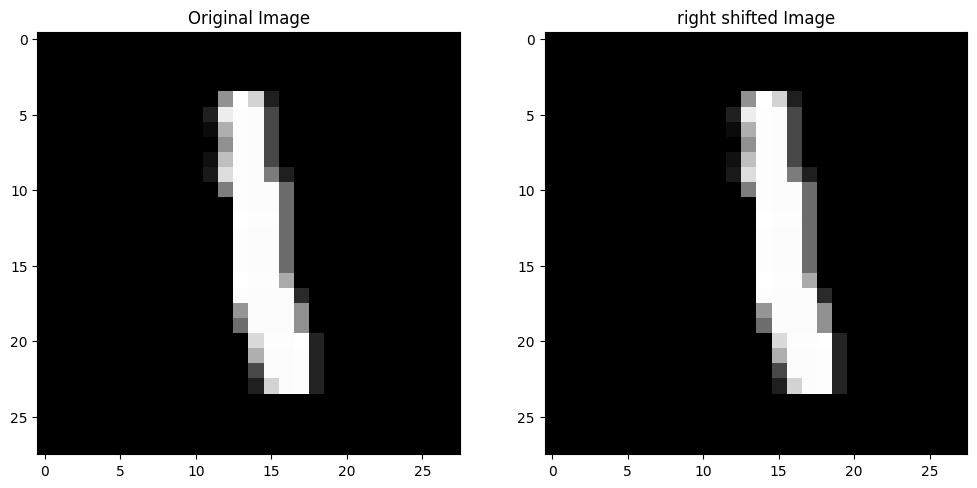

In [5]:
zero = images[labels == 0][0]
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(zero, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(zero_shifted, cmap='gray')
plt.title('right shifted Image')
plt.show()


In [ ]:
eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T

In [ ]:

#print(eVal_shifted)

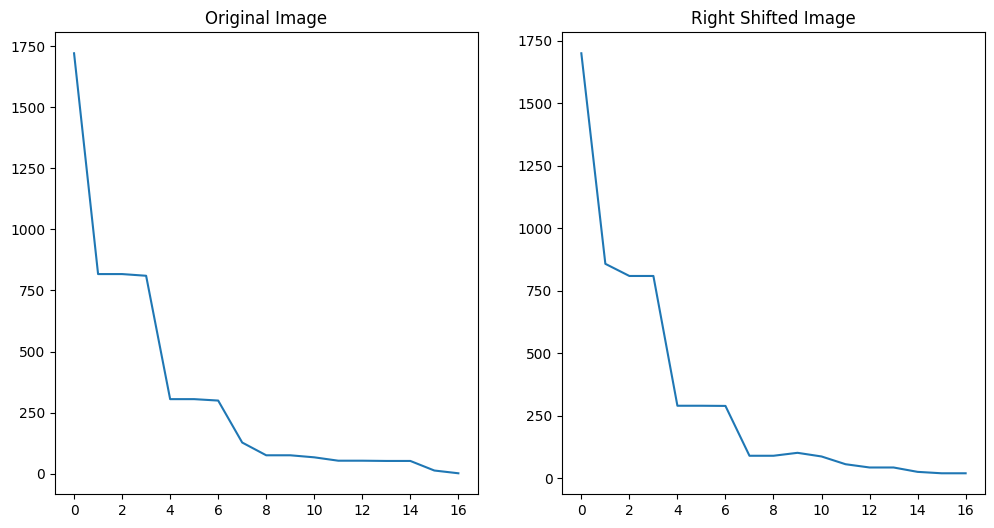

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

In [ ]:
angle = np.zeros((17, 17))

# Calculate angles and populate the angle matrix
for i in range(17):
    for j in range(17):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(17):
    for j in range(17):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")

Pairs with angle >= 0.95:
Pair (i=0, j=0) has cosine similarity: 0.9951
Pair (i=1, j=2) has cosine similarity: 0.9876
Pair (i=1, j=3) has cosine similarity: 0.9876
Pair (i=2, j=2) has cosine similarity: 0.9876
Pair (i=2, j=3) has cosine similarity: 0.9876


Text(0.5, 1.0, 'Right shift Image')

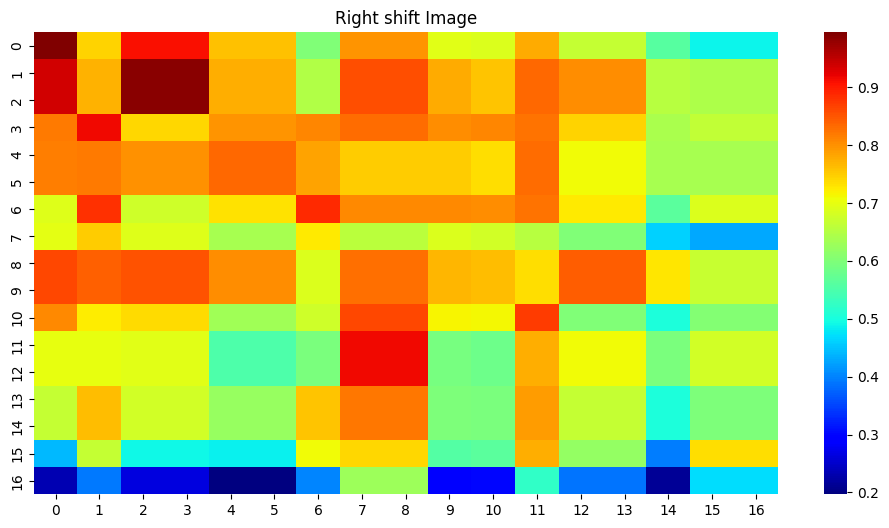

In [ ]:

plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


Shift image left

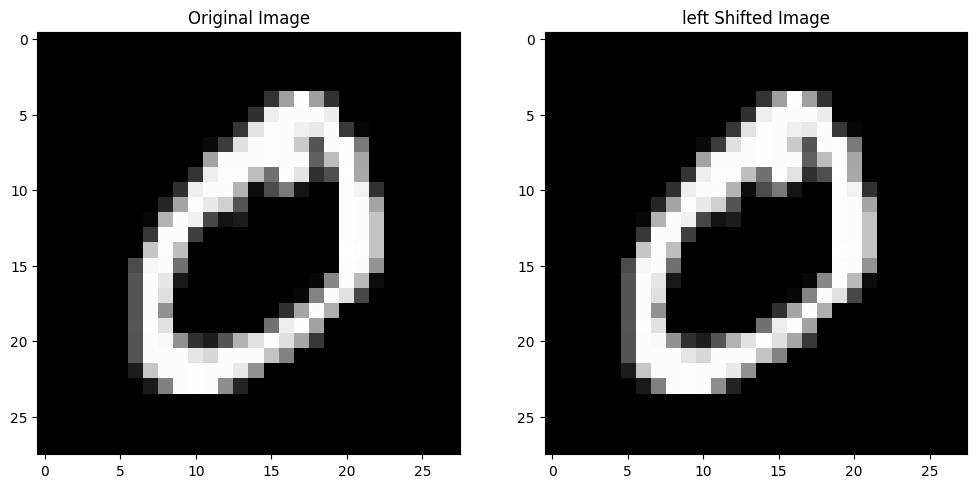

In [ ]:
zero = images[labels == 0][0]
zero_shifted = np.zeros_like(zero)
# Shift the image left by one pixel
for i in range(len(zero)):
    for j in range(len(zero[0]) - 1):
        zero_shifted[i][j] = zero[i][j + 1]
    zero_shifted[i][-1] = 0  # Set the last column to 0 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(zero, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(zero_shifted, cmap='gray')
plt.title('left Shifted Image')
plt.show()


In [ ]:
eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T

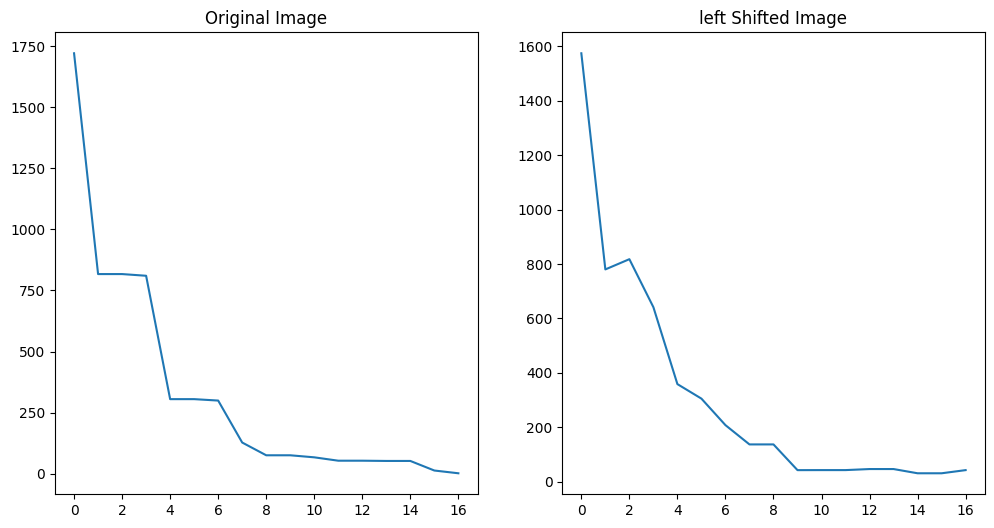

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('left Shifted Image')
plt.show()

In [ ]:
angle2 = np.zeros((17, 17))

# Calculate angles and populate the angle2 matrix
for i in range(17):
    for j in range(17):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle2 matrix
        angle2[i, j] = cosine_similarity

#print(angle2)

print("Pairs with angle2 >= 0.95:")
for i in range(17):
    for j in range(17):
        if angle2[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle2[i, j]:.4f}")

Pairs with angle2 >= 0.95:
Pair (i=0, j=0) has cosine similarity: 0.9969
Pair (i=1, j=2) has cosine similarity: 0.9846
Pair (i=2, j=2) has cosine similarity: 0.9846


Text(0.5, 1.0, 'left sift Image')

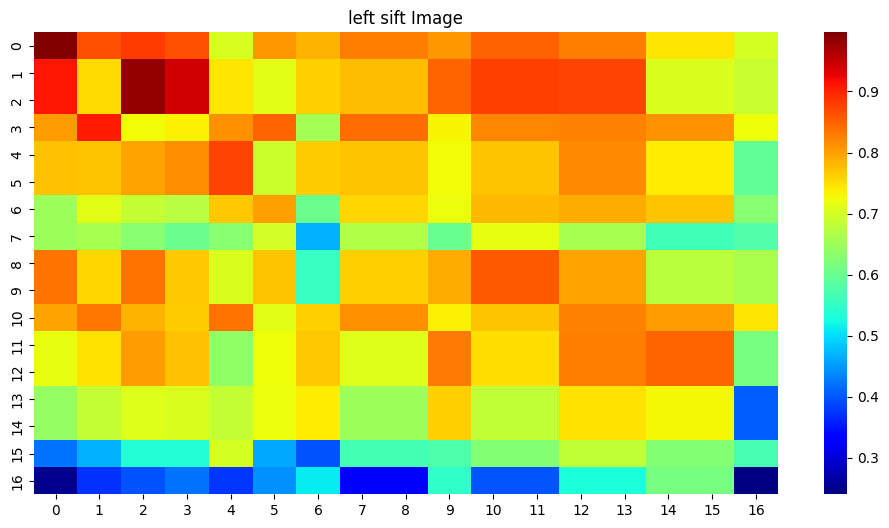

In [ ]:

plt.figure(figsize=(12, 6))
sns.heatmap(angle2, cmap='jet')
plt.title('left sift Image')


Rotate by 90 degree

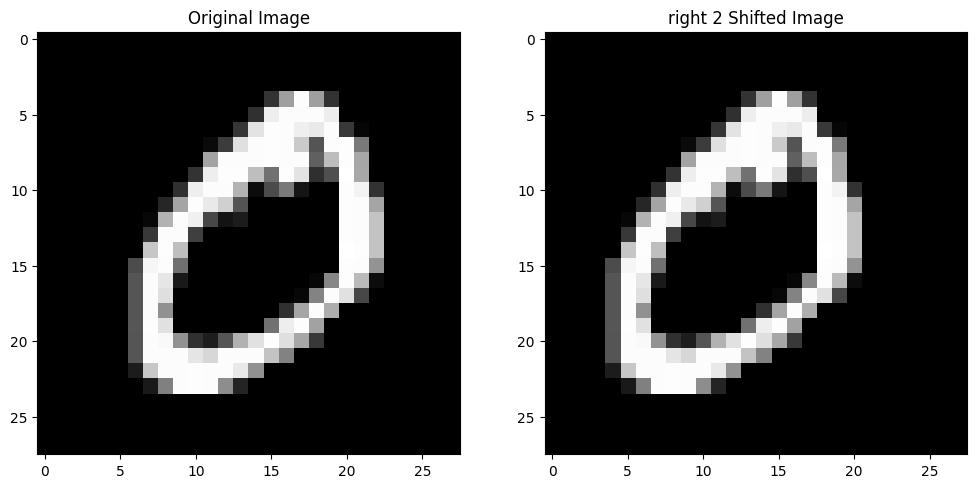

In [ ]:
zero = images[labels == 0][0]
zero_shifted = np.zeros_like(zero)

for i in range(len(zero)):
    for j in range(len(zero[0]) - 2):  # Shift the columns by 2
        zero_shifted[i][j] = zero[i][j + 2]
        
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(zero, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(zero_shifted, cmap='gray')
plt.title('right 2 Shifted Image')
plt.show()


In [ ]:
eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T

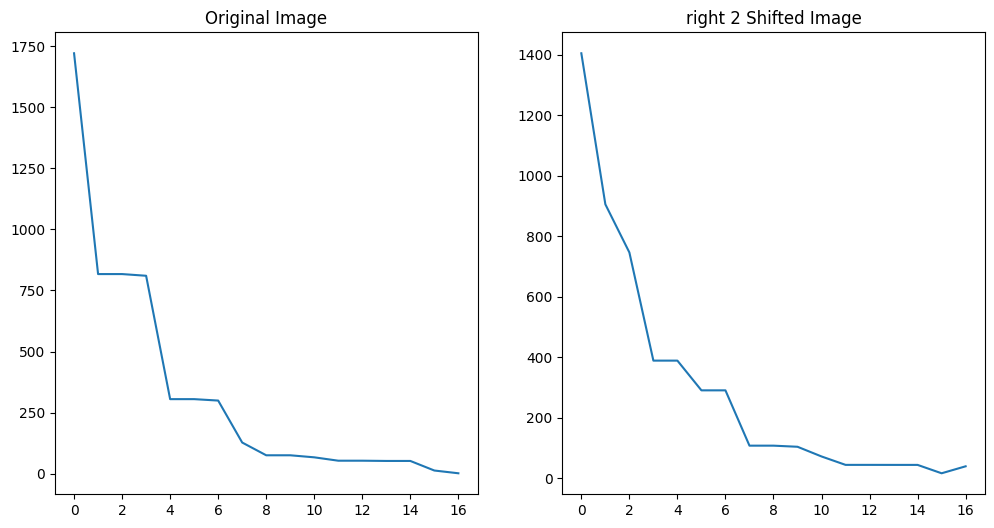

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('right 2 Shifted Image')
plt.show()

In [ ]:
angle3 = np.zeros((17, 17))

# Calculate angles and populate the angle3 matrix
for i in range(17):
    for j in range(17):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle3 matrix
        angle3[i, j] = cosine_similarity

#print(angle3)
print("Pairs with angle3 >= 0.95:")
for i in range(17):
    for j in range(17):
        if angle3[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle3[i, j]:.4f}")

Pairs with angle3 >= 0.95:
Pair (i=0, j=0) has cosine similarity: 0.9867


Text(0.5, 1.0, 'right 2 shift Image')

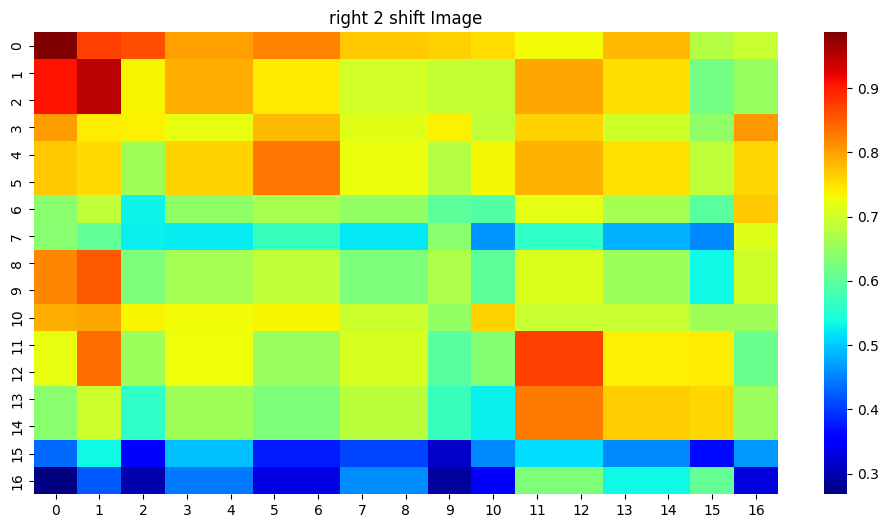

In [ ]:

plt.figure(figsize=(12, 6))
sns.heatmap(angle3, cmap='jet')
plt.title('right 2 shift Image')



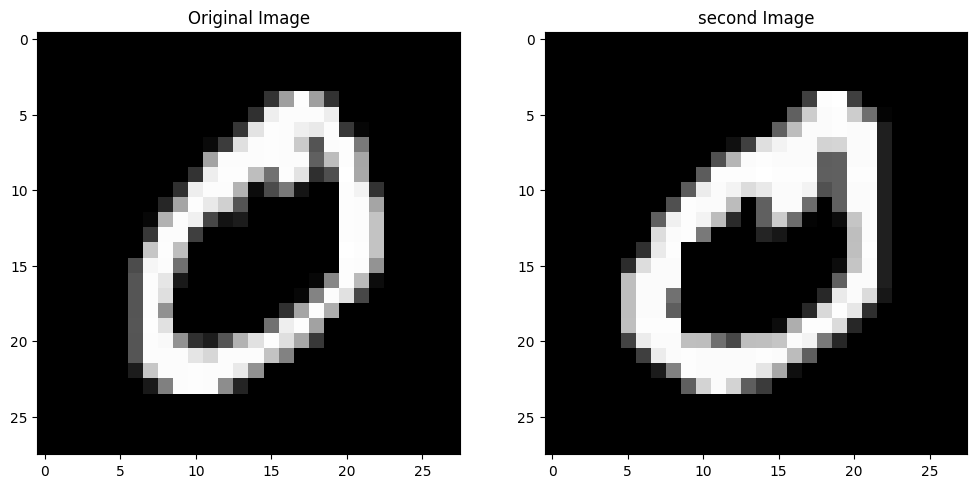

In [ ]:
zero = images[labels == 0][0]
zero_shifted = np.zeros_like(zero)
zero_shifted = images[labels == 0][1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(zero, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(zero_shifted, cmap='gray')
plt.title('second Image')
plt.show()

In [ ]:
eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T

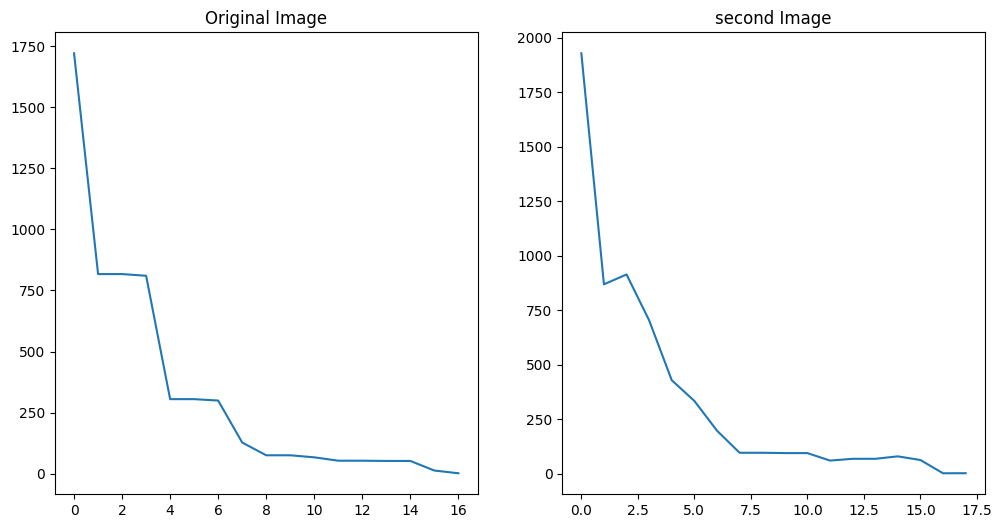

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('second Image')
plt.show()

In [ ]:
angle4 = np.zeros((17, 17))

# Calculate angles and populate the angle4 matrix
for i in range(17):
    for j in range(17):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle4 matrix
        angle4[i, j] = cosine_similarity

#print(angle4)
print("Pairs with angle4 >= 0.95:")
for i in range(17):
    for j in range(17):
        if angle4[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle4[i, j]:.4f}")

Pairs with angle4 >= 0.95:
Pair (i=0, j=0) has cosine similarity: 0.9844
Pair (i=3, j=1) has cosine similarity: 0.9523


Text(0.5, 1.0, 'second Image')

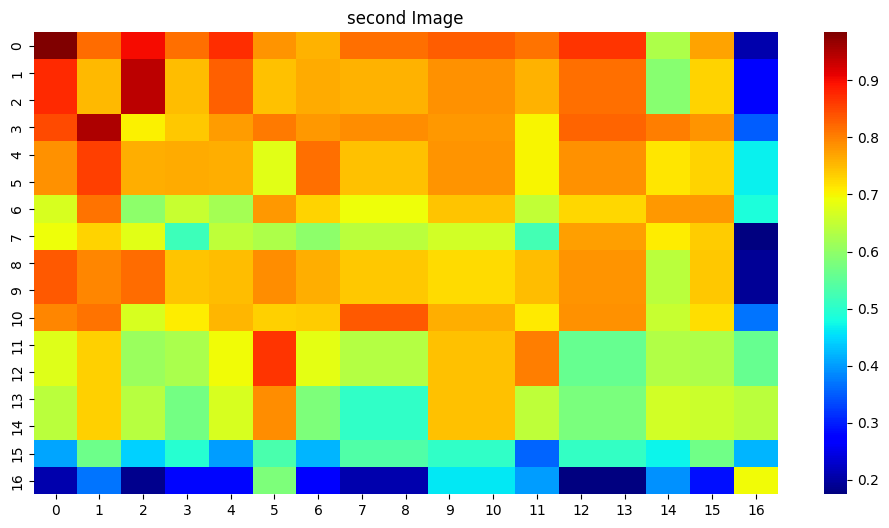

In [ ]:

plt.figure(figsize=(12, 6))
sns.heatmap(angle4, cmap='jet')
plt.title('second Image')



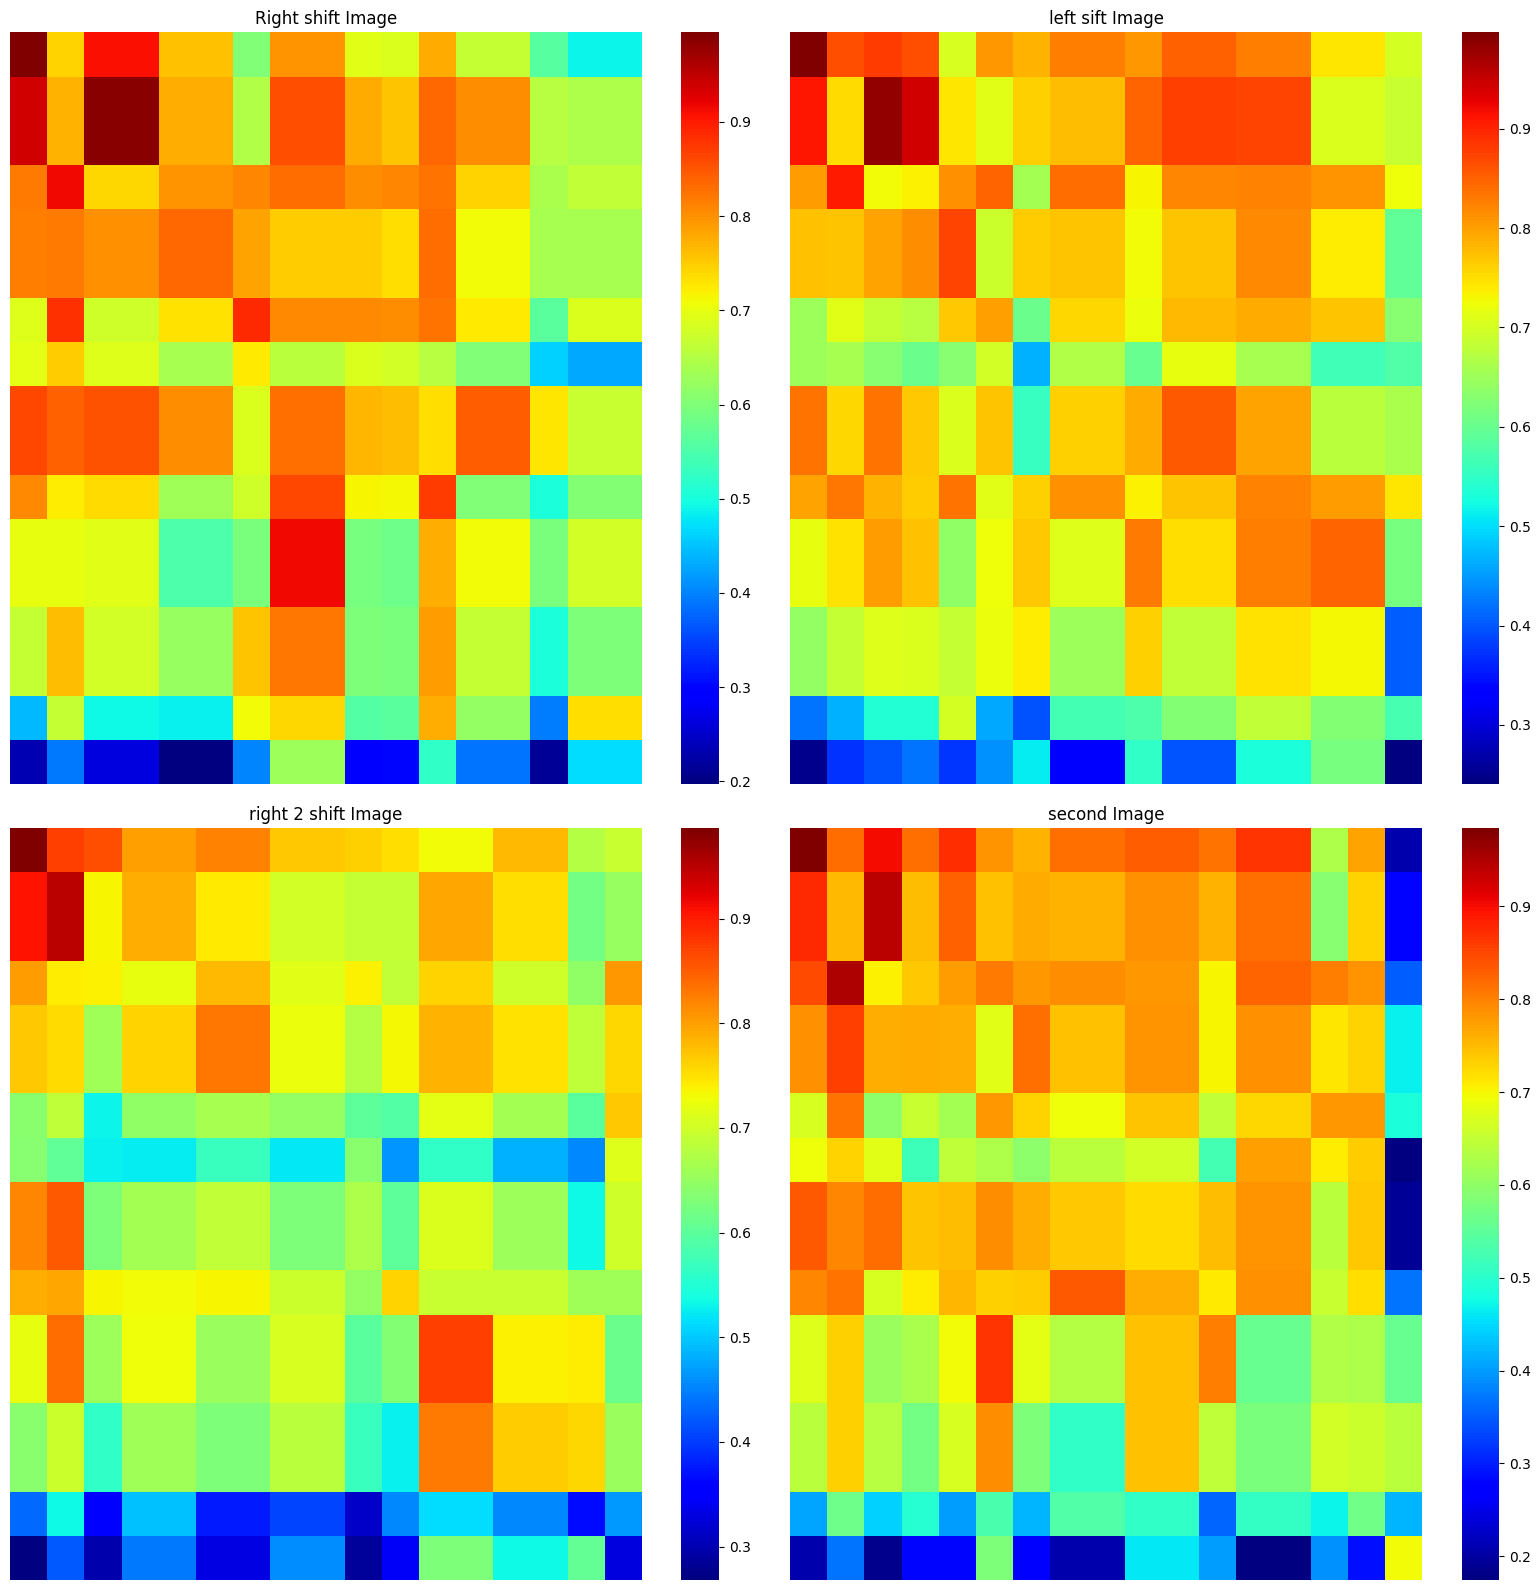

In [ ]:
plt.figure(figsize=(16, 16))


plt.subplot(2, 2, 1)
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')
plt.axis('off')  # Hide the axes

plt.subplot(2, 2, 2)
sns.heatmap(angle2, cmap='jet')
plt.title('left sift Image')
plt.axis('off')  # Hide the axes

plt.subplot(2, 2, 3)
sns.heatmap(angle3, cmap='jet')
plt.title('right 2 shift Image')
plt.axis('off')  # Hide the axes

plt.subplot(2, 2, 4)
sns.heatmap(angle4, cmap='jet')
plt.title('second Image')
plt.axis('off')  # Hide the axes

plt.tight_layout()
plt.show()